# do not set selected regions to 0

## No shot noise

In [101]:
import numpy as np
l = np.load('./non_shot/l.npy')
cl = np.load('./non_shot/cl.npy')
model = np.load('./non_shot/model.npy')

kernel = ['none','10 arcmin','30 arcmin','1 deg']

In [102]:
mean_spec = np.mean(model,axis=0)
for i,spec in enumerate(cl):
    mean = spec.mean(0)
    var = np.mean(((mean_spec-mean)**2)[1:])
    print('%-9s %-3s : %e'%(kernel[i],'var',var))

none      var : 2.798801e-19
10 arcmin var : 3.697547e-19
30 arcmin var : 8.344490e-19
1 deg     var : 1.772508e-18


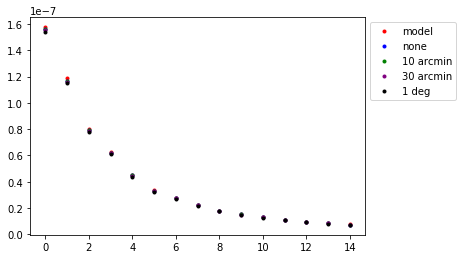

In [103]:
import matplotlib.pyplot as plt
plt.plot(model.mean(0),'.',c='r',label='model')
plt.plot(cl[0].mean(0),'.',c='blue',label=kernel[0])
plt.plot(cl[1].mean(0),'.',c='green',label=kernel[1])
plt.plot(cl[2].mean(0),'.',c='purple',label=kernel[2])
plt.plot(cl[3].mean(0),'.',c='k',label=kernel[3])

#plt.yscale('log')
plt.legend(loc = 'upper left',bbox_to_anchor=(1,1))
plt.show()

## Add shot noise

$$\hat{C}_{gg}=C_{gg}+N_s$$
$$N_s = 1/\bar{n}$$
$$\bar{n}=N_q/N_{pix}$$

In [104]:
l = np.load('./add_shot/l.npy')
cl = np.load('./add_shot/cl.npy')
model = np.load('./add_shot/model.npy')

In [105]:
mean_spec = np.mean(model,axis=0)
for i,spec in enumerate(cl):
    mean = spec.mean(0)
    var = np.mean(((mean_spec-mean)**2)[1:])
    print('%-9s %-3s : %e'%(kernel[i],'var',var))

none      var : 1.564003e-14
10 arcmin var : 1.544812e-14
30 arcmin var : 1.465262e-14
1 deg     var : 1.416742e-14


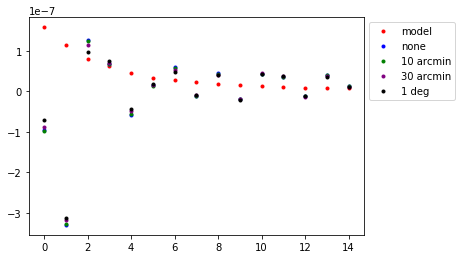

In [106]:
plt.plot(model.mean(0),'.',c='r',label='model')
plt.plot(cl[0].mean(0),'.',c='blue',label=kernel[0])
plt.plot(cl[1].mean(0),'.',c='green',label=kernel[1])
plt.plot(cl[2].mean(0),'.',c='purple',label=kernel[2])
plt.plot(cl[3].mean(0),'.',c='k',label=kernel[3])

#plt.yscale('log')
plt.legend(loc = 'upper left',bbox_to_anchor=(1,1))
plt.show()

# Set selected regions to 0 

## apodize the total

```python
map_k = map_k_tot * mask_k

map_q = map_q_tot * mask_q

smooth_mask_kq = hp.smoothing(mask_k*mask_q,fwhm)

f_kq = np.mean(smooth_mask_kq * mask_k * mask_q)
```


In [107]:
l = np.load('./ap_tot/l.npy')
cl = np.load('./ap_tot/cl.npy')
model = np.load('./ap_tot/model.npy')

kernel = ['none','10 arcmin','30 arcmin','1 deg']

In [108]:
mean_spec = np.mean(model,axis=0)
for i,spec in enumerate(cl):
    mean = spec.mean(0)
    var = np.mean(((mean_spec-mean)**2)[1:])
    print('%-9s %-3s : %e'%(kernel[i],'var',var))

none      var : 2.409928e-19
10 arcmin var : 2.117849e-19
30 arcmin var : 3.674074e-19
1 deg     var : 8.532540e-19


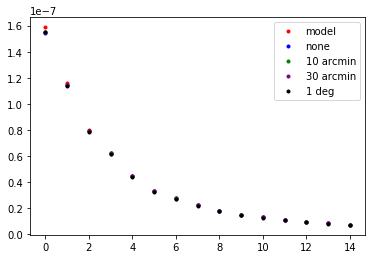

In [109]:
import matplotlib.pyplot as plt
plt.plot(model.mean(0),'.',c='r',label='model')
plt.plot(cl[0].mean(0),'.',c='blue',label=kernel[0])
plt.plot(cl[1].mean(0),'.',c='green',label=kernel[1])
plt.plot(cl[2].mean(0),'.',c='purple',label=kernel[2])
plt.plot(cl[3].mean(0),'.',c='k',label=kernel[3])

plt.legend()
plt.show()

## apodize both:

```python
map_k = map_k_tot * mask_k

map_q = map_q_tot * mask_q

smooth_mask_kq = hp.smoothing(mask_k,fwhm)*hp.smoothing(mask_q,fwhm)

f_kq = np.mean(smooth_mask_kq * mask_k * mask_q)
```

In [110]:
import numpy as np
l = np.load('./ap_both/l.npy')
cl = np.load('./ap_both/cl.npy')
model = np.load('./ap_both/model.npy')

kernel = ['none','10 arcmin','30 arcmin','1 deg']

In [111]:
mean_spec = np.mean(model,axis=0)
for i,spec in enumerate(cl):
    mean = spec.mean(0)
    var = np.mean(((mean_spec-mean)**2)[1:])
    print('%-9s %-3s : %e'%(kernel[i],'var',var))

none      var : 1.344594e-19
10 arcmin var : 1.244793e-19
30 arcmin var : 2.788047e-19
1 deg     var : 6.830882e-19


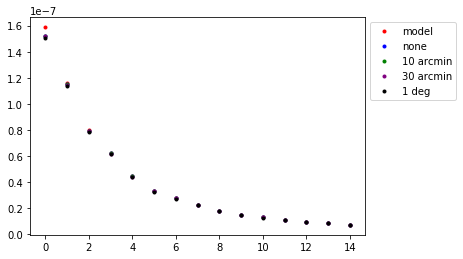

In [112]:
plt.plot(model.mean(0),'.',c='r',label='model')
plt.plot(cl[0].mean(0),'.',c='blue',label=kernel[0])
plt.plot(cl[1].mean(0),'.',c='green',label=kernel[1])
plt.plot(cl[2].mean(0),'.',c='purple',label=kernel[2])
plt.plot(cl[3].mean(0),'.',c='k',label=kernel[3])

#plt.yscale('log')
plt.legend(loc = 'upper left',bbox_to_anchor=(1,1))
plt.show()

## Same as 'apodize both' but add shot noise

In [113]:
import numpy as np
l = np.load('./ap_both_shot/l.npy')
cl = np.load('./ap_both_shot/cl.npy')
model = np.load('./ap_both_shot/model.npy')

kernel = ['none','10 arcmin','30 arcmin','1 deg']

In [114]:
mean_spec = np.mean(model,axis=0)
for i,spec in enumerate(cl):
    mean = spec.mean(0)
    var = np.mean(((mean_spec-mean)**2)[1:])
    print('%-9s %-3s : %e'%(kernel[i],'var',var))

none      var : 4.879257e-15
10 arcmin var : 4.696705e-15
30 arcmin var : 4.270299e-15
1 deg     var : 3.956966e-15


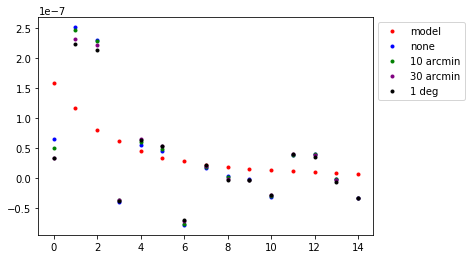

In [115]:
plt.plot(model.mean(0),'.',c='r',label='model')
plt.plot(cl[0].mean(0),'.',c='blue',label=kernel[0])
plt.plot(cl[1].mean(0),'.',c='green',label=kernel[1])
plt.plot(cl[2].mean(0),'.',c='purple',label=kernel[2])
plt.plot(cl[3].mean(0),'.',c='k',label=kernel[3])

#plt.yscale('log')
plt.legend(loc = 'upper left',bbox_to_anchor=(1,1))
plt.show()

## same as 'apodize both' but with wrong sky fraction

```python
f_kq = np.mean(smooth_mask_kq)
```

In [116]:
import numpy as np
l = np.load('./wrong_fkq/l.npy')
cl = np.load('./wrong_fkq/cl.npy')
model = np.load('./wrong_fkq/model.npy')

kernel = ['none','10 arcmin','30 arcmin','1 deg']

In [117]:
mean_spec = np.mean(model,axis=0)
for i,spec in enumerate(cl):
    mean = spec.mean(0)
    var = np.mean(((mean_spec-mean)**2)[1:])
    print('%-9s %-3s : %e'%(kernel[i],'var',var))

none      var : 3.143845e-19
10 arcmin var : 5.736554e-19
30 arcmin var : 1.664139e-18
1 deg     var : 3.730939e-18


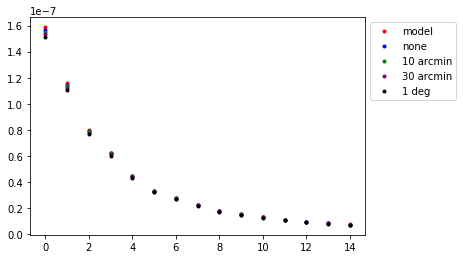

In [118]:
plt.plot(model.mean(0),'.',c='r',label='model')
plt.plot(cl[0].mean(0),'.',c='blue',label=kernel[0])
plt.plot(cl[1].mean(0),'.',c='green',label=kernel[1])
plt.plot(cl[2].mean(0),'.',c='purple',label=kernel[2])
plt.plot(cl[3].mean(0),'.',c='k',label=kernel[3])

#plt.yscale('log')
plt.legend(loc = 'upper left',bbox_to_anchor=(1,1))
plt.show()

# illustration

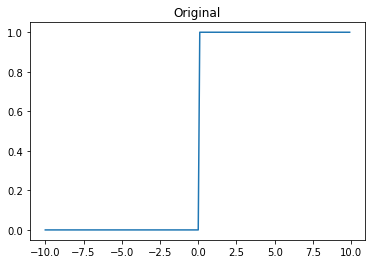

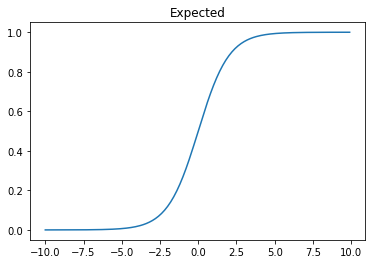

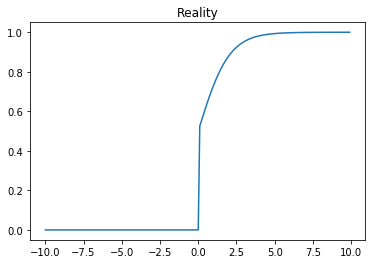

In [136]:
x = np.arange(-10,10,0.1)

y2 = np.zeros(x.shape)
y22 = np.sign(x)
y2[np.where(y22==1.)] = 1
plt.plot(x,y2)
plt.title('Original')
plt.show()

y1 = 1/(1+np.exp(-x))
plt.plot(x,y1)
plt.title('Expected')
plt.show()

y3 = np.copy(y1)
y3[np.where(y22==-1.)] = 0
plt.plot(x,y3)
plt.title('Reality')
plt.show()
